# Analyze activation values

### Load data

In [196]:
import numpy as np
fast_model_fast_data = np.load("nighttime_ai_fast_model_fast_data_activations.npy")
fast_model_slow_data = np.load("nighttime_ai_fast_model_slow_data_activations.npy")
slow_model_fast_data = np.load("nighttime_ai_slow_model_fast_data_activations.npy")
slow_model_slow_data = np.load("nighttime_ai_slow_model_slow_data_activations.npy")

[d.shape for d in (fast_model_fast_data, fast_model_slow_data, slow_model_fast_data, slow_model_slow_data)]


[(19250, 256), (20304, 256), (19250, 256), (20304, 256)]

In [197]:
# check if ReLu was applied
[np.min(d) for d in (fast_model_fast_data, fast_model_slow_data, slow_model_fast_data, slow_model_slow_data)]


[0.0, 0.0, 0.0, 0.0]

In [198]:
[np.max(d) for d in (fast_model_fast_data, fast_model_slow_data, slow_model_fast_data, slow_model_slow_data)]


[3.988, 3.594, 4.88, 4.64]

In [199]:
[np.mean(d) for d in (fast_model_fast_data, fast_model_slow_data, slow_model_fast_data, slow_model_slow_data)]


[0.266, 0.2834, 0.2073, 0.3042]

In [200]:
[np.median(d) for d in (fast_model_fast_data, fast_model_slow_data, slow_model_fast_data, slow_model_slow_data)]


[0.0, 0.0, 0.0, 0.007706]

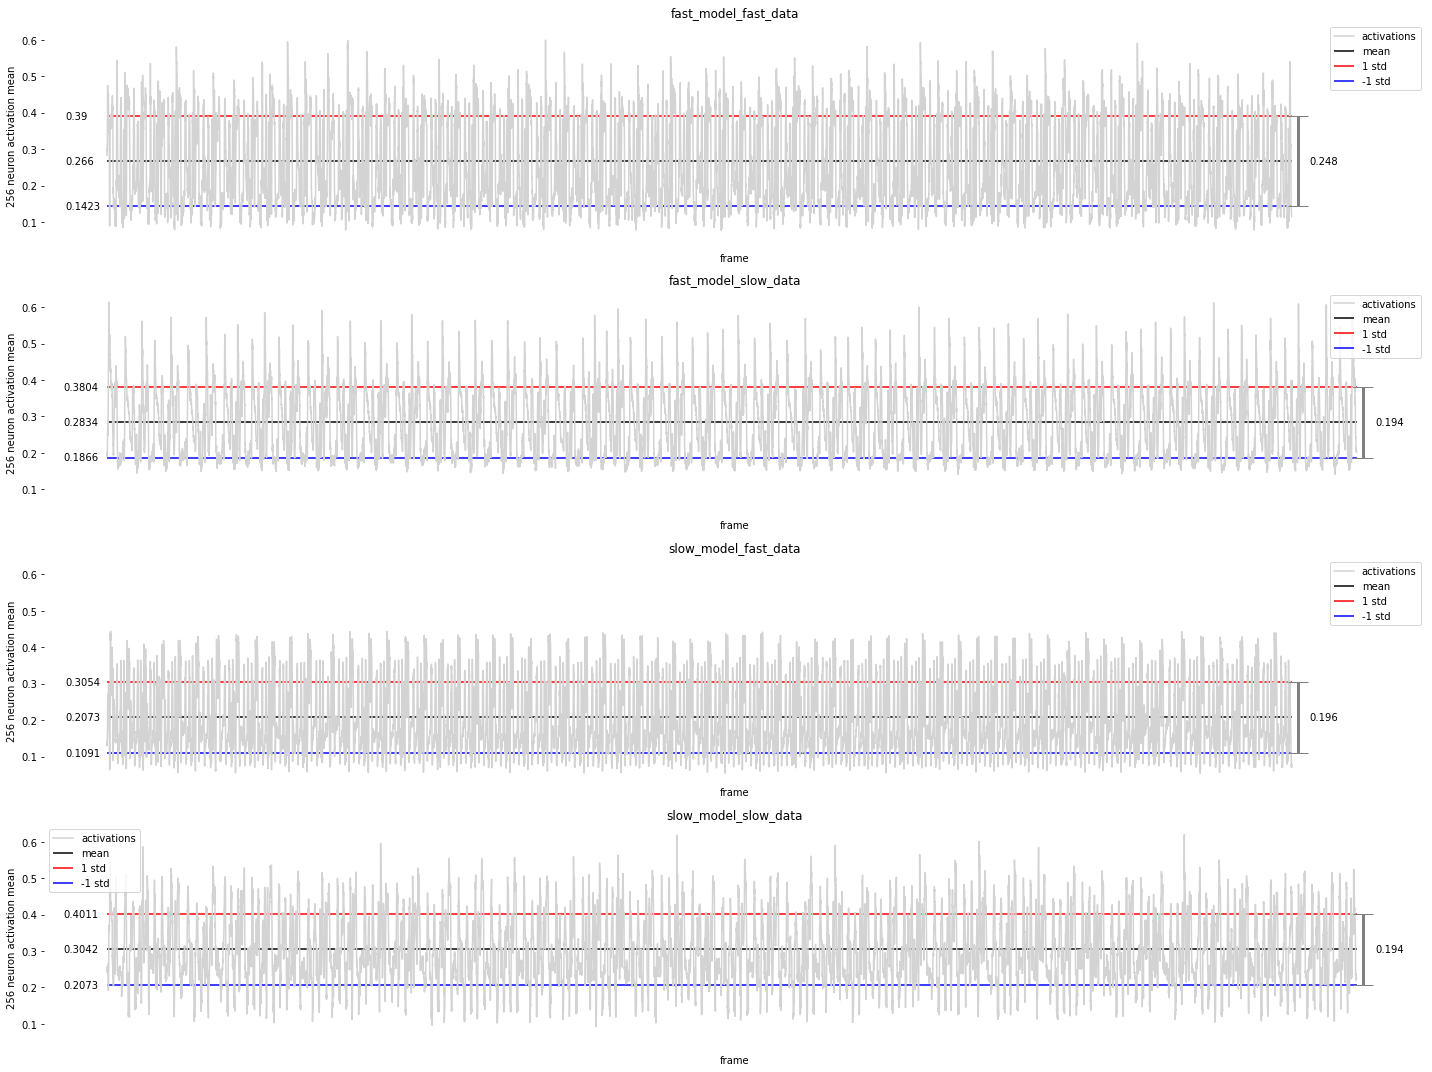

In [244]:
from matplotlib import pyplot as plt

frame_activations = dict(
    fast_model_fast_data=fast_model_fast_data.mean(axis=1),
    fast_model_slow_data=fast_model_slow_data.mean(axis=1),
    slow_model_fast_data=slow_model_fast_data.mean(axis=1),
    slow_model_slow_data=slow_model_slow_data.mean(axis=1),
)

def plot_activations(activations, ylabel, xlabel):
    fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(20, 15), sharex='all', sharey='all')
    for (name, data), ax in zip(activations.items(), axs.flat):
        ax.set(title=name, ylabel=ylabel, xlabel=xlabel)
        # ax.grid(True, axis='y')
        ax.plot(data, 'lightgrey', label='activations')
        linewtext(ax, len(data), data.mean(), 'mean', 'black')
        linewtext(ax, len(data), data.mean()+data.std(), '1 std', 'red')
        linewtext(ax, len(data), data.mean()-data.std(), '-1 std', 'blue')
        two_std_bar(ax, data)
        ax.legend()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.get_xaxis().set_ticks([])
    fig.tight_layout()
    plt.show()


def two_std_bar(ax, data):
    ax.errorbar(1.005 * len(data), data.mean(), yerr=data.std(), ecolor='grey', elinewidth=3, capsize=10)
    ax.text(1.015 * len(data), data.mean(), np.round(2 * data.std(), 3), ha='left', va='center')


def linewtext(ax, length, value, label, color):
    ax.text(-0.035 * length, value, value, ha='left', va='center')
    ax.hlines(value, 0, length, color, label=label)


plot_activations(frame_activations, '256 neuron activation mean', 'frame')

In [245]:
fast_model_fast_data_neuron_means = np.mean(fast_model_fast_data, axis=0)
fast_model_slow_data_neuron_means = np.mean(fast_model_slow_data, axis=0)
slow_model_fast_data_neuron_means = np.mean(slow_model_fast_data, axis=0)
slow_model_slow_data_neuron_means = np.mean(slow_model_slow_data, axis=0)

[d.mean() for d in [
    fast_model_fast_data_neuron_means,
    fast_model_slow_data_neuron_means,
    slow_model_fast_data_neuron_means,
    slow_model_slow_data_neuron_means,
]]

[0.266, 0.2837, 0.2073, 0.3042]

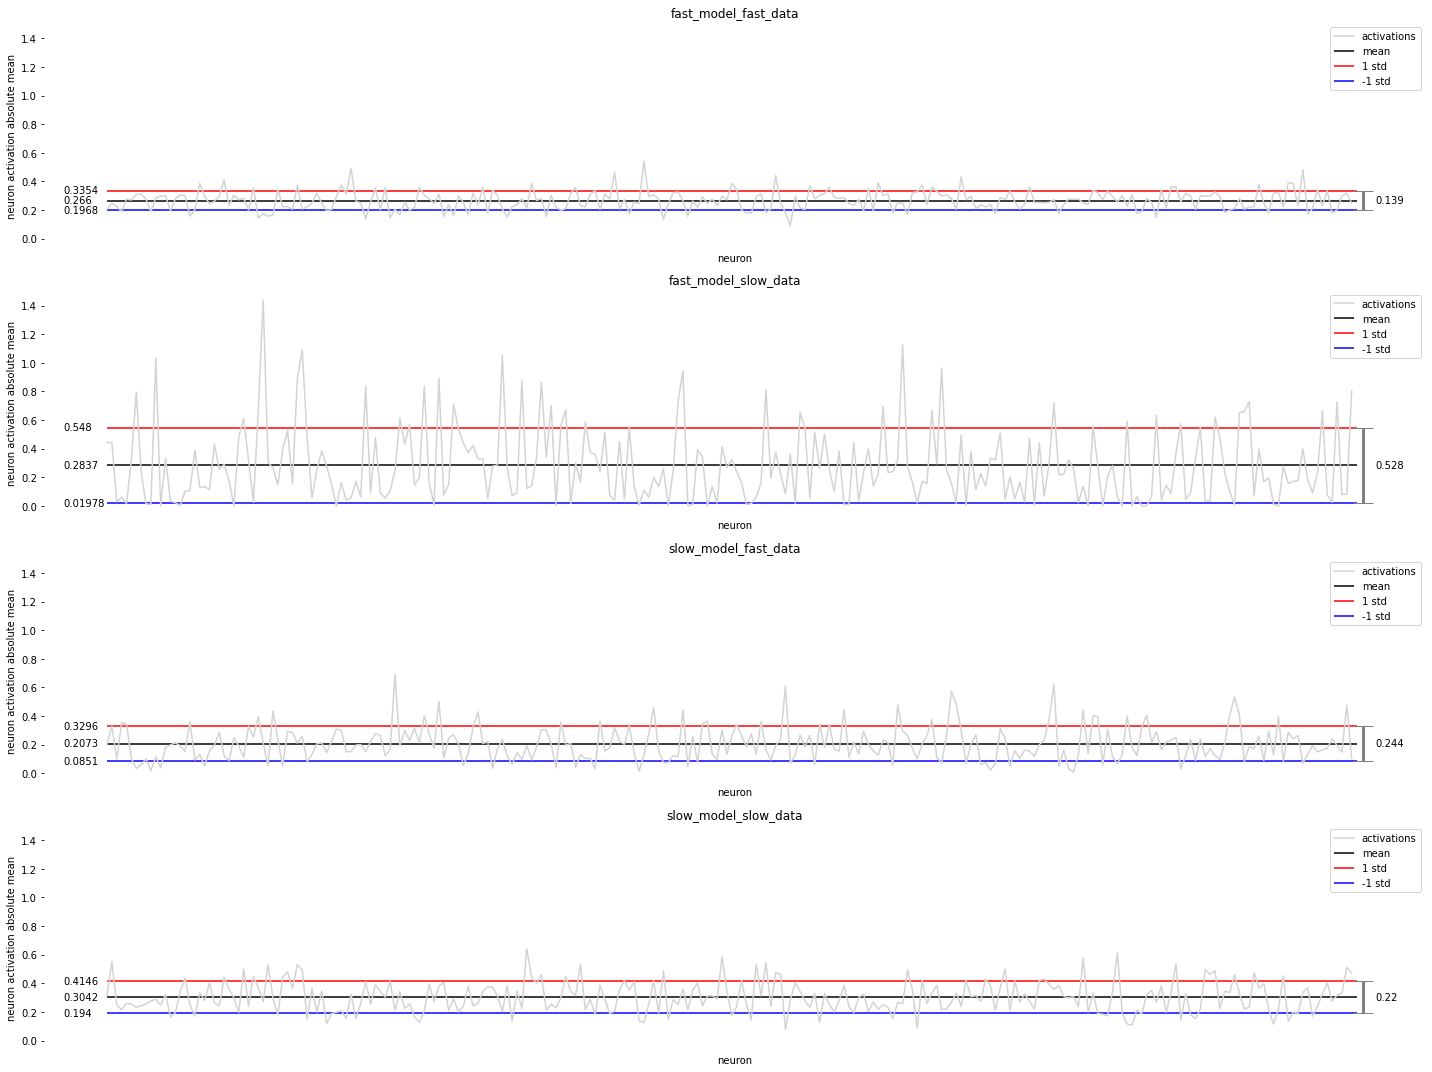

In [246]:
neuron_activations = dict(
    fast_model_fast_data=fast_model_fast_data.mean(axis=0),
    fast_model_slow_data=fast_model_slow_data.mean(axis=0),
    slow_model_fast_data=slow_model_fast_data.mean(axis=0),
    slow_model_slow_data=slow_model_slow_data.mean(axis=0),
)

plot_activations(neuron_activations, 'neuron activation absolute mean', 'neuron')

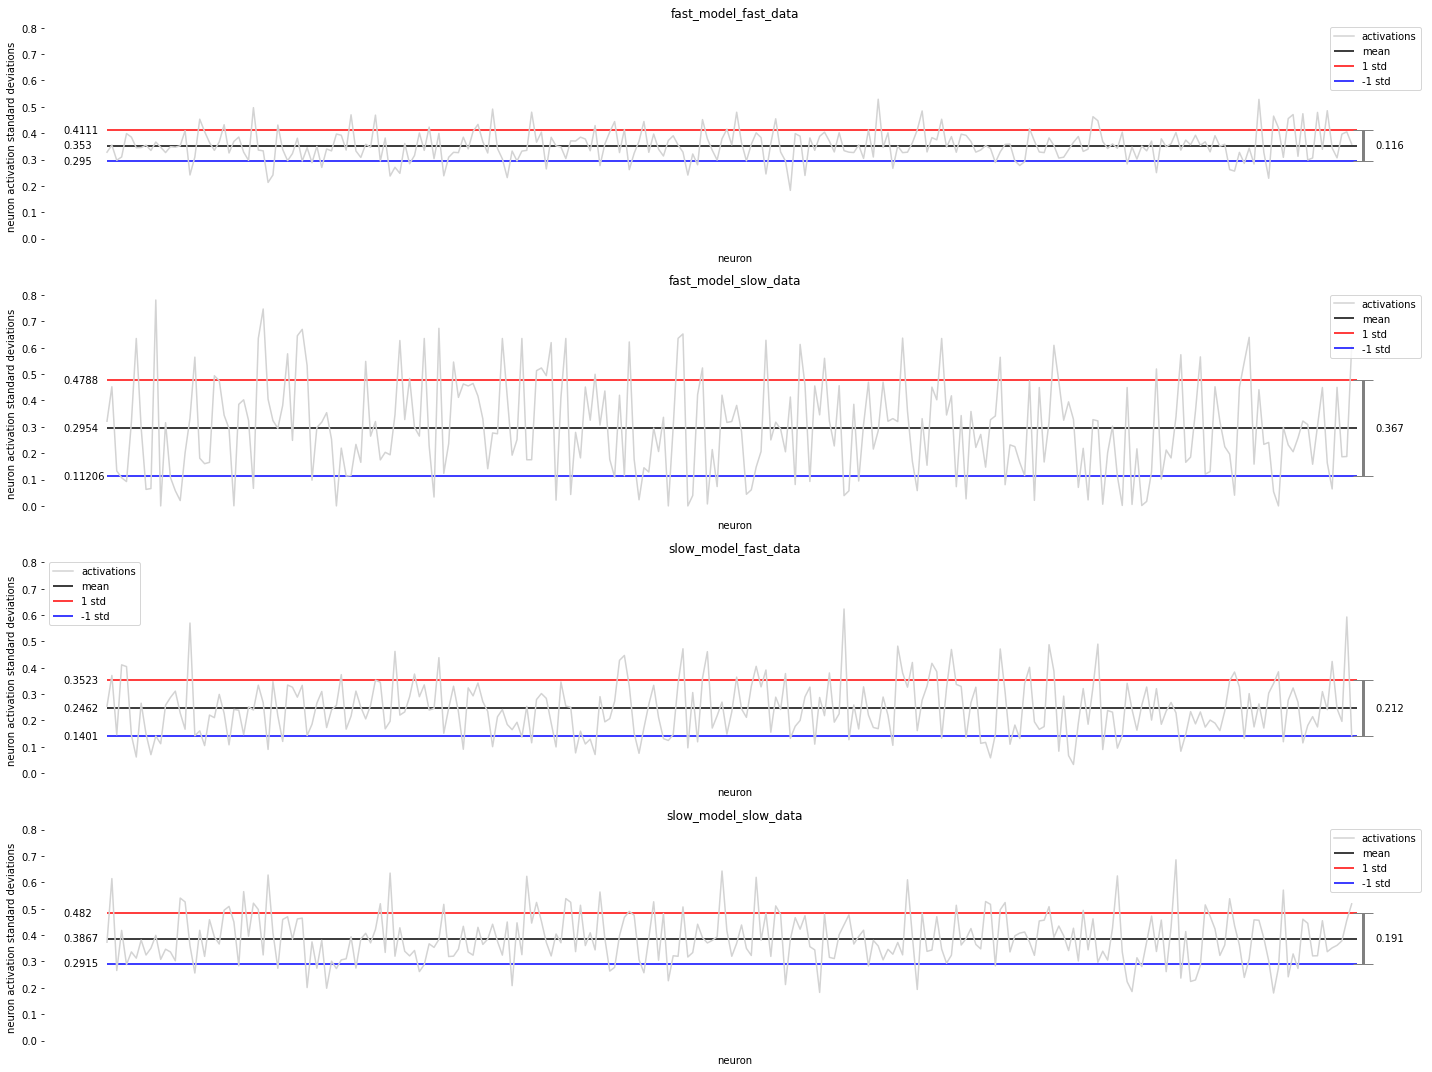

In [249]:
neuron_activations = dict(
    fast_model_fast_data=fast_model_fast_data.std(axis=0),
    fast_model_slow_data=fast_model_slow_data.std(axis=0),
    slow_model_fast_data=slow_model_fast_data.std(axis=0),
    slow_model_slow_data=slow_model_slow_data.std(axis=0),
)

plot_activations(neuron_activations, 'neuron activation standard deviations', 'neuron')

In [248]:

fast_model_fast_data_neuron_std = np.std(fast_model_fast_data, axis=0)
fast_model_slow_data_neuron_std = np.std(fast_model_slow_data, axis=0)
slow_model_fast_data_neuron_std = np.std(slow_model_fast_data, axis=0)
slow_model_slow_data_neuron_std = np.std(slow_model_slow_data, axis=0)

[d.std() for d in [
    fast_model_fast_data_neuron_std,
    fast_model_slow_data_neuron_std,
    slow_model_fast_data_neuron_std,
    slow_model_slow_data_neuron_std,
]]

[0.0581, 0.1833, 0.106, 0.09534]